# Import all required Library

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Imported All require libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,roc_curve, auc
from xgboost import XGBClassifier
import warnings
from sklearn.exceptions import UndefinedMetricWarning
# Suppress UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
from sklearn.ensemble import RandomForestClassifier, VotingClassifier


# Merging the all csv file in single one

In [ ]:
import os
import pandas as pd

def merge_csv_files(folder_path, output_file):
    # Get a list of all CSV files in the specified folder
    csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

    # Check if there are any CSV files in the folder
    if not csv_files:
        print("No CSV files found in the specified folder.")
        return

    # Initialize an empty DataFrame to store the merged data
    merged_data = pd.DataFrame()

    # Loop through each CSV file and merge its data into the DataFrame
    for csv_file in csv_files:
        file_path = os.path.join(folder_path, csv_file)
        df = pd.read_csv(file_path)
        merged_data = pd.concat([merged_data, df], ignore_index=True)

    # Write the merged data to a new CSV file
    merged_data.to_csv(output_file, index=False)
    print(f"Merged data saved to {output_file}")

# Example usage
folder_path = 'Vivek'
output_file = 'merged_data.csv'
merge_csv_files(folder_path, output_file)


In [ ]:
#Reading the dataset using pandas read_csv function
# df=pd.read_csv('merged_data.csv')
df=pd.read_csv('/content/drive/MyDrive/Research With sir/part-00167-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv')
# df = df.sample(frac=1.00, random_state=42) #if you want to use fraction of data from you dataset
pd.set_option('display.max_columns', None)#set_option is use to show all the column
df1=df
df2=df

In [ ]:
# df['label'].unique()

## Exploratory Data Analysis (EDA)

In [ ]:
#sample shows the r+andom data from the dataset we can use df.head also
df.sample(5)

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,cwr_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,TCP,UDP,DHCP,ARP,ICMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
12765,0.010877,12327.8,17.0,65.91,25406.338494,25406.338494,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,559.2,50.0,84.2,54.675931,10.722577,51.8,8.301601e+07,9.5,10.403683,15.177638,649.275883,0.19,141.55,DoS-UDP_Flood
21479,0.084366,38725.0,17.0,64.00,9178.372251,9178.372251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,525.0,50.0,50.0,50.000000,0.000000,50.0,8.302853e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DoS-UDP_Flood
199070,0.000000,54.0,6.0,64.00,2.148793,2.148793,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.0,54.0,54.0,54.000000,0.000000,54.0,8.334385e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-RSTFINFlood
16623,0.024430,8456.0,17.0,64.00,10099.146220,10099.146220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,525.0,50.0,50.0,50.000000,0.000000,50.0,8.310282e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DDoS-UDP_Flood
45293,0.000000,54.0,6.0,64.00,28.035199,28.035199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.0,54.0,54.0,54.000000,0.000000,54.0,8.307617e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-TCP_Flood


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227688 entries, 0 to 227687
Data columns (total 47 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   flow_duration    227688 non-null  float64
 1   Header_Length    227688 non-null  float64
 2   Protocol Type    227688 non-null  float64
 3   Duration         227688 non-null  float64
 4   Rate             227688 non-null  float64
 5   Srate            227688 non-null  float64
 6   Drate            227688 non-null  float64
 7   fin_flag_number  227688 non-null  float64
 8   syn_flag_number  227688 non-null  float64
 9   rst_flag_number  227688 non-null  float64
 10  psh_flag_number  227688 non-null  float64
 11  ack_flag_number  227688 non-null  float64
 12  ece_flag_number  227688 non-null  float64
 13  cwr_flag_number  227688 non-null  float64
 14  ack_count        227688 non-null  float64
 15  syn_count        227688 non-null  float64
 16  fin_count        227688 non-null  floa

In [ ]:
#if we observe clearly out data is highly distibuted and also you can see
df.describe()


,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,cwr_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,TCP,UDP,DHCP,ARP,ICMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
count,227688.000000,2.276880e+05,227688.000000,227688.000000,2.276880e+05,2.276880e+05,227688.000000,227688.000000,227688.000000,227688.000000,227688.000000,227688.000000,227688.0,227688.0,227688.000000,227688.000000,227688.000000,227688.000000,227688.000000,227688.000000,227688.000000,227688.000000,227688.0,227688.0,227688.000000,227688.0,227688.000000,227688.000000,227688.000000,227688.000000,227688.000000,227688.000000,227688.000000,227688.000000,227688.000000,227688.000000,227688.000000,227688.000000,227688.000000,2.276880e+05,227688.000000,227688.000000,227688.000000,2.276880e+05,227688.000000,227688.000000
mean,6.015720,7.641584e+04,9.065825,66.328434,9.118321e+03,9.118321e+03,0.000003,0.086135,0.206686,0.089926,0.087405,0.123024,0.0,0.0,0.090230,0.329631,0.098644,6.058466,38.442786,0.047991,0.055317,0.000167,0.0,0.0,0.000035,0.0,0.572577,0.211965,0.000009,0.000083,0.164453,0.999886,0.999886,1312.067896,91.676460,183.050330,125.124498,33.715427,125.337232,8.313477e+07,9.495907,13.141083,47.651563,3.113549e+04,0.097240,141.446174
std,273.531924,4.588211e+05,8.951779,13.829755,1.000905e+05,1.000905e+05,0.000821,0.280565,0.404929,0.286076,0.282428,0.328465,0.0,0.0,0.286039,0.662483,0.344369,69.012528,324.780205,0.213748,0.228598,0.012918,0.0,0.0,0.005927,0.0,0.494706,0.408701,0.002964,0.009135,0.370687,0.010685,0.010685,2610.996249,138.351518,528.669541,240.597991,161.418475,242.116124,1.697121e+07,0.815478,8.650836,228.297592,3.540371e+05,0.234035,20.972401
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,54.000000,42.000000,42.000000,42.000000,0.000000,42.000000,0.000000e+00,1.000000,9.165151,0.000000,0.000000e+00,0.000000,1.000000
25%,0.000000,5.400000e+01,6.000000,64.000000,2.098083e+00,2.098083e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,525.000000,50.000000,50.000000,50.000000,0.000000,50.000000,8.307157e+07,9.500000,10.000000,0.000000,0.000000e+00,0.000000,141.550000
50%,0.000000,5.400000e+01,6.000000,64.000000,1.566526e+01,1.566526e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,567.000000,54.000000,54.000000,54.000000,0.000000,54.000000,8.312452e+07,9.500000,10.392305,0.000000,0.000000e+00,0.000000,141.550000
75%,0.104117,2.898925e+02,14.330000,64.000000,1.156140e+02,1.156140e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.060000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,567.600000,54.000000,55.300000,54.052793,0.384222,54.060000,8.334388e+07,9.500000,10.396749,0.516078,1.503761e+00,0.080000,141.550000
max,53555.155685,9.734315e+06,47.000000,255.000000,6.291456e+06,6.291456e+06,0.378076,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,5.300000,8.000000,69.500000,3140.000000,9447.500000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,60697.000000,2922.000000,26130.000000,6886.319048,8026.920297,5003.600000,1.676394e+08,13.500000,109.161439,11351.779549,7.370417e+07,1.00000

In [ ]:
# we can clerly see that there is no null value in the dataset
df.isnull().sum()

flow_duration      0
Header_Length      0
Protocol Type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
urg_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Magnitue           0
Radius             0
Covariance         0
Variance           0
Weight             0
label              0
dtype: int64

In [ ]:
# if you focus on our tatget column(lavel) which is 34 it means this problem would be the multi class classification problem
df.nunique()['label']


34

# Univariate Analysis of the dataset

<ipython-input-22-761b6785f1be>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


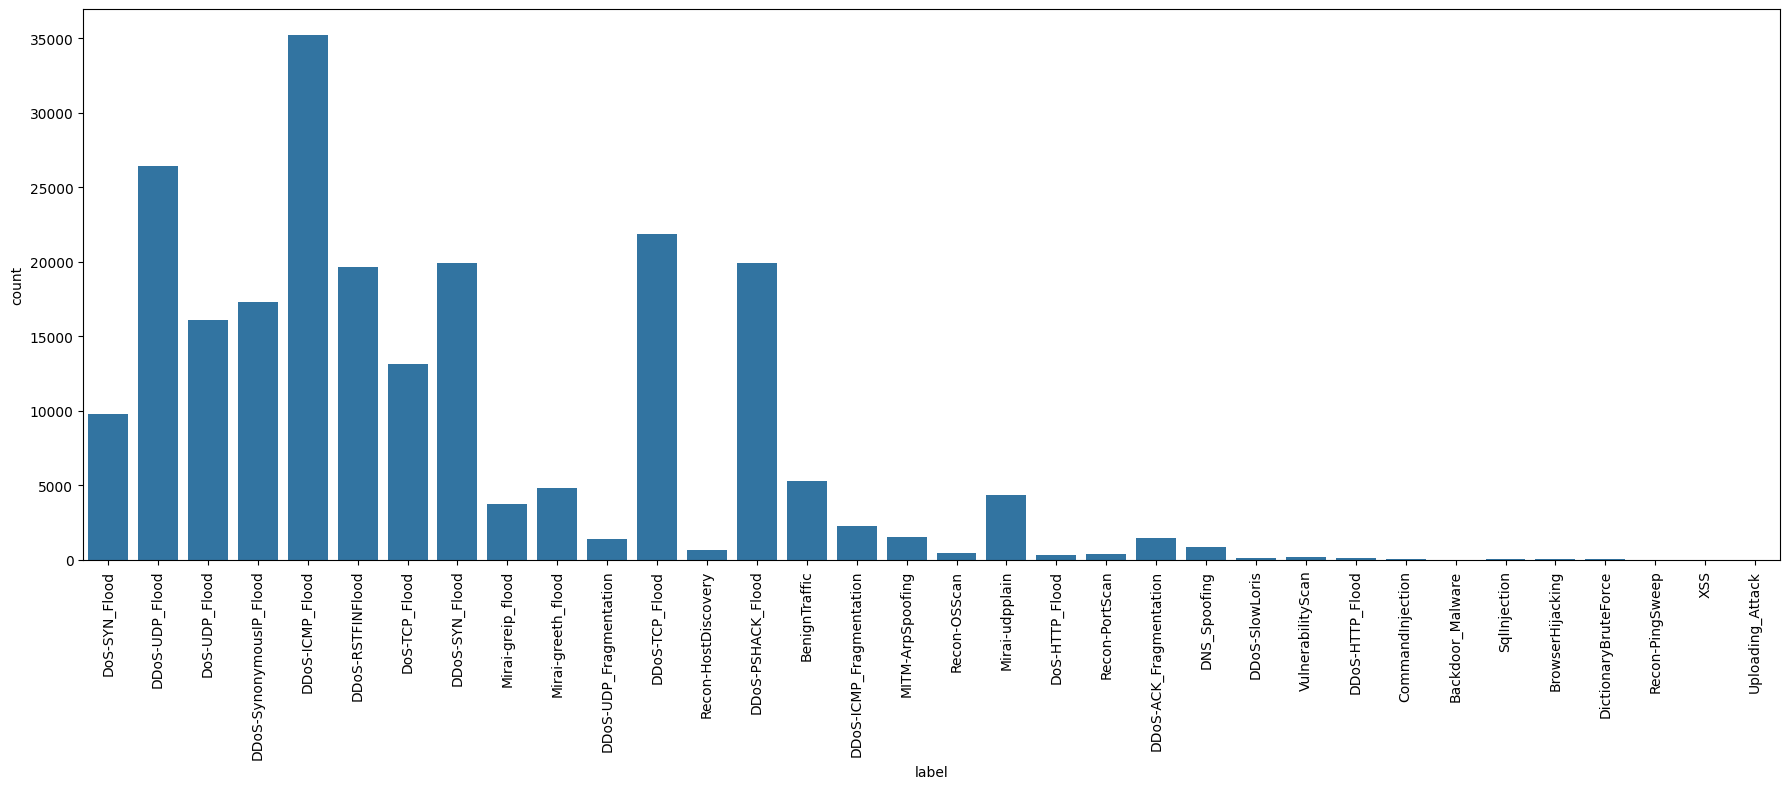

In [ ]:
plt.figure(figsize=(18, 8))
ax = sns.countplot(x='label', data=df, orient='h')

# Rotate the labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Adjust layout to avoid clipping
plt.tight_layout()


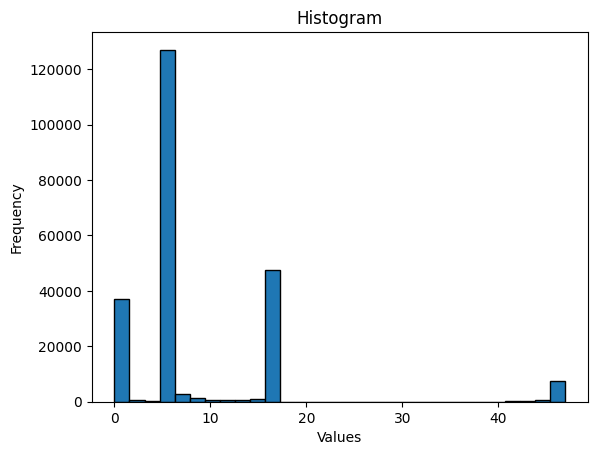

In [ ]:
#histogram of a single data
plt.hist(df['Protocol Type'], bins=30, edgecolor='black')
plt.title('Histogram')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

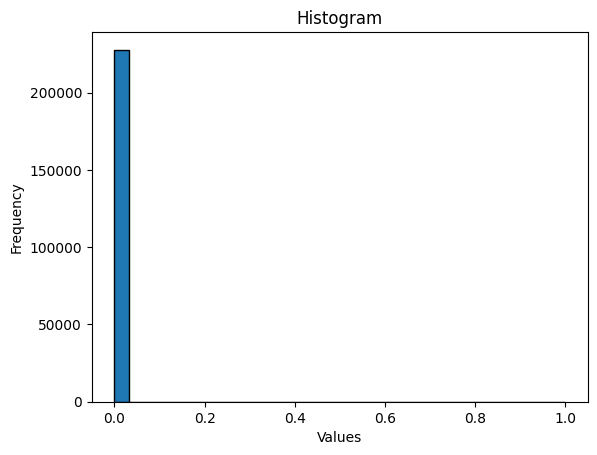

In [ ]:
plt.hist(df['SSH'], bins=30, edgecolor='black')
plt.title('Histogram')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

<Axes: >

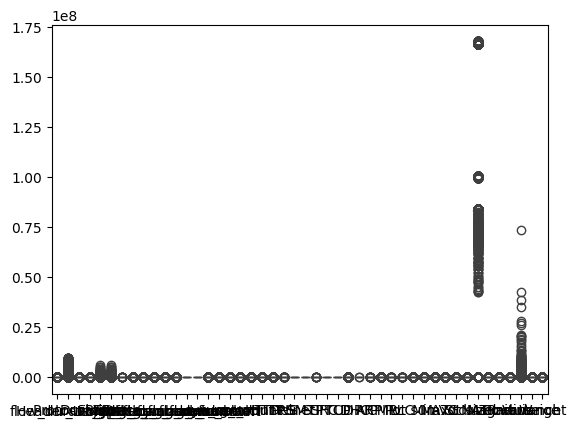

In [ ]:

sns.boxplot(df)

<Axes: ylabel='urg_count'>

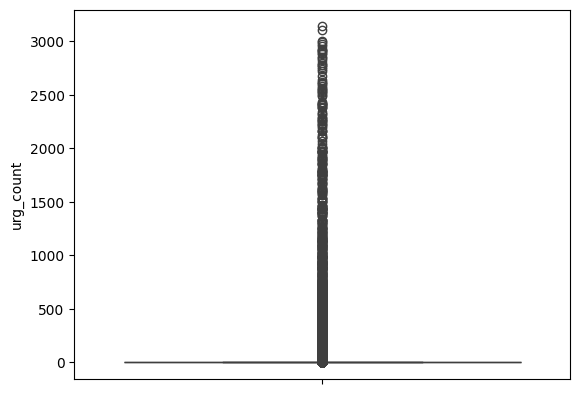

In [ ]:
sns.boxplot(df['urg_count'])

# Classification With 34(33+1) classes

# Labeling  the dataset

In [ ]:
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])


# Spliting the dataset

In [ ]:
X = df.drop('label', axis=1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=10)


# Scaling the dataset

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Random Forest

In [ ]:
rf1 = RandomForestClassifier(n_estimators=5, max_depth=20, min_samples_leaf=10, max_features='sqrt', random_state=42)
rf1.fit(X_train_scaled, y_train)


RandomForestClassifier(max_depth=20, min_samples_leaf=10, n_estimators=5,
                       random_state=42)

In [ ]:
# Make predictions on training and testing sets
y_train_pred = rf1.predict(X_train_scaled)
y_test_pred = rf1.predict(X_test_scaled)

# Evaluate the model on training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy: {train_accuracy:.2f}')

# Evaluate the model on testing set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Testing Accuracy: {test_accuracy:.2f}')

# Print classification reports for both sets
print('Training Classification Report:')
print(classification_report(y_train, y_train_pred,zero_division=0))

print('Testing Classification Report:')
print(classification_report(y_test, y_test_pred,zero_division=0))
plt


Training Accuracy: 0.98
Testing Accuracy: 0.98
Training Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.82      0.99      0.90      4253
           2       0.00      0.00      0.00        25
           3       0.00      0.00      0.00        28
           4       1.00      0.99      0.99      1207
           5       0.83      0.70      0.76       117
           6       1.00      1.00      1.00     28167
           7       1.00      0.98      0.99      1839
           8       1.00      1.00      1.00     16045
           9       1.00      1.00      1.00     15824
          10       0.97      0.99      0.98     15884
          11       0.70      0.85      0.76        71
          12       1.00      0.97      0.99     13823
          13       0.98      1.00      0.99     17520
          14       0.99      1.00      0.99     21101
          15       0.98      0.99      0.99      1149
  

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

# Logistic Regression

In [ ]:
# Apply Logistic Regression
lr1 = LogisticRegression(C=1.0, max_iter=500, solver='lbfgs', random_state=42)
lr1.fit(X_train_scaled, y_train)

# Make predictions on training and testing sets
y_train_pred = lr1.predict(X_train_scaled)
y_test_pred = lr1.predict(X_test_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:

# Evaluate the model on training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy: {train_accuracy:.2f}')

# Evaluate the model on testing set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Testing Accuracy: {test_accuracy:.2f}')

# Print classification reports for both sets
print('Training Classification Report:')
print(classification_report(y_train, y_train_pred))

print('Testing Classification Report:')
print(classification_report(y_test, y_test_pred))

Training Accuracy: 0.83
Testing Accuracy: 0.83
Training Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.70      0.94      0.80      4253
           2       0.00      0.00      0.00        25
           3       0.90      0.32      0.47        28
           4       0.98      0.99      0.98      1207
           5       0.63      0.59      0.61       117
           6       1.00      1.00      1.00     28167
           7       1.00      0.97      0.99      1839
           8       1.00      1.00      1.00     16045
           9       1.00      1.00      1.00     15824
          10       0.66      0.96      0.78     15884
          11       0.45      0.21      0.29        71
          12       0.78      0.71      0.75     13823
          13       0.72      0.96      0.82     17520
          14       0.71      0.97      0.82     21101
          15       0.96      0.97      0.96      1149
  

# XG Boost

In [ ]:
# Apply XGBoost
xg1 = XGBClassifier(
     max_depth=2,          # Reduce the depth of each tree
    learning_rate=0.43,    # Decrease the learning rate
    n_estimators=5,     # Reduce the number of trees
    reg_alpha=0.5,        # L1 regularization
    reg_lambda=0.5        # L2 regularization
)
xg1.fit(X_train_scaled, y_train)

# Make predictions on training and testing sets
y_train_pred = xg1.predict(X_train_scaled)
y_test_pred = xg1.predict(X_test_scaled)

# Evaluate the model on training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy: {train_accuracy:.2f}')

# Evaluate the model on testing set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Testing Accuracy: {test_accuracy:.2f}')

# Print classification reports for both sets
print('Training Classification Report:')
print(classification_report(y_train, y_train_pred))

print('Testing Classification Report:')
print(classification_report(y_test, y_test_pred))


Training Accuracy: 0.98
Testing Accuracy: 0.98
Training Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.79      0.88      0.83      4253
           2       0.00      0.00      0.00        25
           3       1.00      0.07      0.13        28
           4       0.99      0.96      0.98      1207
           5       0.89      0.68      0.77       117
           6       1.00      1.00      1.00     28167
           7       0.99      0.97      0.98      1839
           8       1.00      1.00      1.00     16045
           9       1.00      1.00      1.00     15824
          10       0.99      1.00      1.00     15884
          11       0.75      0.42      0.54        71
          12       1.00      1.00      1.00     13823
          13       1.00      1.00      1.00     17520
          14       0.99      1.00      0.99     21101
          15       0.98      0.96      0.97      1149
  

# Ensemble learning

In [ ]:
# Create a VotingClassifier
ensemble_classifier = VotingClassifier(estimators=[
    ('rf', rf1),
    ('logreg', lr1),
    ('xgb', xg1)
], voting='hard')  # Use 'soft' for soft voting with probabilities

# Train the ensemble classifier
ensemble_classifier.fit(X_train_scaled, y_train)

# Make predictions on training and testing sets
y_train_pred = ensemble_classifier.predict(X_train_scaled)
y_test_pred = ensemble_classifier.predict(X_test_scaled)

# Evaluate the ensemble on training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy: {train_accuracy:.2f}')

# Evaluate the ensemble on testing set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Testing Accuracy: {test_accuracy:.2f}')

# Print classification reports for both sets
print('Training Classification Report:')
print(classification_report(y_train, y_train_pred,zero_division=0))

print('Testing Classification Report:')
print(classification_report(y_test, y_test_pred,zero_division=0))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy: 0.98
Testing Accuracy: 0.98
Training Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.74      0.99      0.84      4253
           2       0.00      0.00      0.00        25
           3       1.00      0.18      0.30        28
           4       1.00      0.99      0.99      1207
           5       0.78      0.72      0.75       117
           6       1.00      1.00      1.00     28167
           7       1.00      0.98      0.99      1839
           8       1.00      1.00      1.00     16045
           9       1.00      1.00      1.00     15824
          10       0.97      1.00      0.98     15884
          11       0.83      0.42      0.56        71
          12       1.00      0.97      0.99     13823
          13       0.98      1.00      0.99     17520
          14       0.99      1.00      0.99     21101
          15       0.98      0.98      0.98      1149
  

# Working With 8(7+1) Classses

In [ ]:
#Reading the dataset using pandas read_csv function
# df=pd.read_csv('merged_data.csv')
df=pd.read_csv('/content/drive/MyDrive/Research With sir/part-00167-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv')
# df = df.sample(frac=1.00, random_state=42) #if you want to use fraction of data from you dataset
pd.set_option('display.max_columns', None)#set_option is use to show all the column
df1=df
df2=df

In [ ]:
df1=df
def map_classes(df1):
    class_mapping = {
        'DDoS-RSTFINFlood': 'DDoS', 'DDoS-PSHACK_Flood': 'DDoS', 'DDoS-SYN_Flood': 'DDoS',
        'DDoS-UDP_Flood': 'DDoS', 'DDoS-TCP_Flood': 'DDoS', 'DDoS-ICMP_Flood': 'DDoS',
        'DDoS-SynonymousIP_Flood': 'DDoS', 'DDoS-ACK_Fragmentation': 'DDoS',
        'DDoS-UDP_Fragmentation': 'DDoS', 'DDoS-ICMP_Fragmentation': 'DDoS',
        'DDoS-SlowLoris': 'DDoS', 'DDoS-HTTP_Flood': 'DDoS',

        'DoS-UDP_Flood': 'DoS', 'DoS-SYN_Flood': 'DoS', 'DoS-TCP_Flood': 'DoS',
        'DoS-HTTP_Flood': 'DoS',

        'Mirai-greeth_flood': 'Mirai', 'Mirai-greip_flood': 'Mirai', 'Mirai-udpplain': 'Mirai',

        'Recon-PingSweep': 'Recon', 'Recon-OSScan': 'Recon', 'Recon-PortScan': 'Recon',
        'VulnerabilityScan': 'Recon', 'Recon-HostDiscovery': 'Recon',

        'DNS_Spoofing': 'Spoofing', 'MITM-ArpSpoofing': 'Spoofing',

        'BenignTraffic': 'Benign',

        'BrowserHijacking': 'Web', 'Backdoor_Malware': 'Web', 'XSS': 'Web',
        'Uploading_Attack': 'Web', 'SqlInjection': 'Web', 'CommandInjection': 'Web',

        'DictionaryBruteForce': 'BruteForce'
    }

    df1['label'] = df1['label'].map(class_mapping)
    return df1.dropna()  # Drop rows with NaN values

def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate the model on training set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    print(f'Training Accuracy: {train_accuracy:.2f}')

    # Evaluate the model on testing set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f'Testing Accuracy: {test_accuracy:.2f}')

    # Print classification reports for both sets
    print('Training Classification Report:')
    print(classification_report(y_train, y_train_pred))

    print('Testing Classification Report:')
    print(classification_report(y_test, y_test_pred))

# Load your dataset
# Replace 'your_dataset.csv' with the actual path to your dataset


# Map classes and handle missing values
df1 = map_classes(df1)

# Encode target variable
label_encoder = LabelEncoder()
df1['label'] = label_encoder.fit_transform(df1['label'])

# Split the data into training and testing sets
X = df1.drop('label', axis=1)
y = df1['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create individual classifiers
rf_classifier = RandomForestClassifier(n_estimators=5, max_depth=20, min_samples_leaf=10, max_features='sqrt', random_state=42)
logreg_classifier = LogisticRegression(C=1.0, max_iter=500, solver='lbfgs', random_state=42)
xgb_classifier = XGBClassifier(
     max_depth=2,          # Reduce the depth of each tree
    learning_rate=0.43,    # Decrease the learning rate
    n_estimators=5,     # Reduce the number of trees
    reg_alpha=0.5,        # L1 regularization
    reg_lambda=0.5        # L2 regularization
)

# Train and evaluate individual classifiers
print("Random Forest Classifier:")
train_and_evaluate(rf_classifier, X_train_scaled, y_train, X_test_scaled, y_test)

print("\nLogistic Regression:")
train_and_evaluate(logreg_classifier, X_train_scaled, y_train, X_test_scaled, y_test)

print("\nXGBoost Classifier:")
train_and_evaluate(xgb_classifier, X_train_scaled, y_train, X_test_scaled, y_test)

# Create a VotingClassifier
ensemble_classifier = VotingClassifier(estimators=[
    ('rf', rf_classifier),
    ('logreg', logreg_classifier),
    ('xgb', xgb_classifier)
], voting='hard')  # Use 'soft' for soft voting with probabilities

# Train and evaluate the ensemble classifier
print("\nEnsemble Classifier:")
train_and_evaluate(ensemble_classifier, X_train_scaled, y_train, X_test_scaled, y_test)


Random Forest Classifier:
Training Accuracy: 0.99
Testing Accuracy: 0.99
Training Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      4260
           1       0.00      0.00      0.00        44
           2       1.00      1.00      1.00    132561
           3       1.00      1.00      1.00     31596
           4       1.00      1.00      1.00     10340
           5       0.83      0.70      0.76      1365
           6       0.87      0.81      0.84      1872
           7       0.00      0.00      0.00       112

    accuracy                           0.99    182150
   macro avg       0.70      0.68      0.69    182150
weighted avg       0.99      0.99      0.99    182150

Testing Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      1057
           1       0.00      0.00      0.00        12
           2       1.00      1.00      1.00     33

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy: 0.86
Testing Accuracy: 0.86
Training Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.91      0.81      4260
           1       1.00      0.18      0.31        44
           2       0.86      0.99      0.92    132561
           3       0.87      0.32      0.47     31596
           4       1.00      0.99      0.99     10340
           5       0.64      0.43      0.52      1365
           6       0.79      0.51      0.62      1872
           7       0.25      0.01      0.02       112

    accuracy                           0.86    182150
   macro avg       0.77      0.54      0.58    182150
weighted avg       0.86      0.86      0.83    182150

Testing Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.89      0.80      1057
           1       0.00      0.00      0.00        12
           2       0.86      0.99      0.92     33213
           3       0.8

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy: 0.99
Testing Accuracy: 0.99
Training Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.98      0.88      4260
           1       1.00      0.18      0.31        44
           2       1.00      1.00      1.00    132561
           3       1.00      1.00      1.00     31596
           4       1.00      0.99      1.00     10340
           5       0.83      0.55      0.66      1365
           6       0.91      0.74      0.81      1872
           7       0.00      0.00      0.00       112

    accuracy                           0.99    182150
   macro avg       0.82      0.68      0.71    182150
weighted avg       0.99      0.99      0.99    182150

Testing Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.96      0.86      1057
           1       0.00      0.00      0.00        12
           2       1.00      1.00      1.00     33213
           3       1.0

<Axes: ylabel='count'>

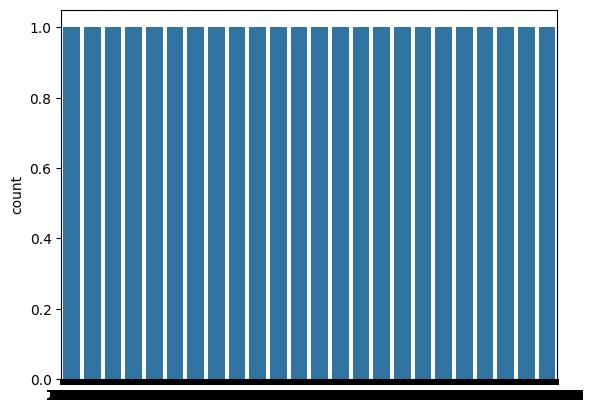

In [ ]:
sns.countplot(df1['label'])

# Classification: 2 (1+1) Classes

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

def map_classes(df):
    attack_classes = [
        'DDoS-RSTFINFlood', 'DDoS-PSHACK_Flood', 'DDoS-SYN_Flood', 'DDoS-UDP_Flood',
        'DDoS-TCP_Flood', 'DDoS-ICMP_Flood', 'DDoS-SynonymousIP_Flood', 'DDoS-ACK_Fragmentation',
        'DDoS-UDP_Fragmentation', 'DDoS-ICMP_Fragmentation', 'DDoS-SlowLoris', 'DDoS-HTTP_Flood',
        'DoS-UDP_Flood', 'DoS-SYN_Flood', 'DoS-TCP_Flood', 'DoS-HTTP_Flood',
        'Mirai-greeth_flood', 'Mirai-greip_flood', 'Mirai-udpplain',
        'Recon-PingSweep', 'Recon-OSScan', 'Recon-PortScan', 'VulnerabilityScan', 'Recon-HostDiscovery',
        'DNS_Spoofing', 'MITM-ArpSpoofing',
        'BrowserHijacking', 'Backdoor_Malware', 'XSS', 'Uploading_Attack', 'SqlInjection', 'CommandInjection',
        'DictionaryBruteForce'
    ]

    df['label'] = df['label'].apply(lambda x: 'Attack' if x in attack_classes else 'Benign')
    return df

def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate the model on training set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    print(f'Training Accuracy: {train_accuracy:.2f}')

    # Evaluate the model on testing set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f'Testing Accuracy: {test_accuracy:.2f}')

    # Print classification reports for both sets
    print('Training Classification Report:')
    print(classification_report(y_train, y_train_pred))

    print('Testing Classification Report:')
    print(classification_report(y_test, y_test_pred))

# Load your dataset
# Replace 'your_dataset.csv' with the actual path to your dataset


# Map classes
df = map_classes(df)

# Encode target variable
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

# Split the data into training and testing sets
X = df.drop('label', axis=1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create individual classifiers
rf_classifier = RandomForestClassifier(random_state=42)
logreg_classifier = LogisticRegression(random_state=42)
xgb_classifier = XGBClassifier(random_state=42)

# Train and evaluate individual classifiers
print("Random Forest Classifier:")
train_and_evaluate(rf_classifier, X_train_scaled, y_train, X_test_scaled, y_test)

print("\nLogistic Regression:")
train_and_evaluate(logreg_classifier, X_train_scaled, y_train, X_test_scaled, y_test)

print("\nXGBoost Classifier:")
train_and_evaluate(xgb_classifier, X_train_scaled, y_train, X_test_scaled, y_test)

# Create a VotingClassifier
ensemble_classifier = VotingClassifier(estimators=[
    ('rf', rf_classifier),
    ('logreg', logreg_classifier),
    ('xgb', xgb_classifier)
], voting='hard')  # Use 'soft' for soft voting with probabilities

# Train and evaluate the ensemble classifier
print("\nEnsemble Classifier:")
train_and_evaluate(ensemble_classifier, X_train_scaled, y_train, X_test_scaled, y_test)


Random Forest Classifier:
Training Accuracy: 1.00
Testing Accuracy: 1.00
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    177890
           1       1.00      1.00      1.00      4260

    accuracy                           1.00    182150
   macro avg       1.00      1.00      1.00    182150
weighted avg       1.00      1.00      1.00    182150

Testing Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44481
           1       0.93      0.93      0.93      1057

    accuracy                           1.00     45538
   macro avg       0.96      0.96      0.96     45538
weighted avg       1.00      1.00      1.00     45538


Logistic Regression:


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy: 0.99
Testing Accuracy: 0.99
Training Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    177890
           1       0.79      0.73      0.76      4260

    accuracy                           0.99    182150
   macro avg       0.89      0.86      0.87    182150
weighted avg       0.99      0.99      0.99    182150

Testing Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     44481
           1       0.79      0.72      0.75      1057

    accuracy                           0.99     45538
   macro avg       0.89      0.86      0.87     45538
weighted avg       0.99      0.99      0.99     45538


XGBoost Classifier:
Training Accuracy: 1.00
Testing Accuracy: 1.00
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    177890
           1       0.99    

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy: 1.00
Testing Accuracy: 1.00
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    177890
           1       0.99      1.00      0.99      4260

    accuracy                           1.00    182150
   macro avg       0.99      1.00      1.00    182150
weighted avg       1.00      1.00      1.00    182150

Testing Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44481
           1       0.92      0.92      0.92      1057

    accuracy                           1.00     45538
   macro avg       0.96      0.96      0.96     45538
weighted avg       1.00      1.00      1.00     45538

